In [1]:
# data loader
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
strong_c1pg =  pd.read_csv("./Data/Prediction_data/strong_c1pg.csv",index_col=0)
arima_strong = pd.read_csv("./Data/Prediction_data/strong_arima.csv",index_col = 0)
tran_strong = pd.read_csv("./Data/Prediction_data/tran_strong.csv",index_col=0)
diffusion_strong = pd.read_csv("./Data/Prediction_data/strong_diffusion.csv",index_col = 0)


columns = ['4141', '4212', '4283', '4354', '4425', '4496',
           '4567', '4638', '4709', '4780']#, '4851', '4922', '4993', '5064', '5135'

In [2]:

def RSE(pred, true):
    return np.sqrt(np.sum((true - pred) ** 2)) / np.sqrt(np.sum((true - true.mean()) ** 2))


def CORR(pred, true):
    u = ((true - true.mean(0)) * (pred - pred.mean(0))).sum(0)
    d = np.sqrt(((true - true.mean(0)) ** 2 * (pred - pred.mean(0)) ** 2).sum(0))
    return (u / d).mean(-1)


def CRPS(true, mu, sigma):
    obs = np.mean(ps.crps_gaussian(x=true, mu=mu, sig=sigma))
    return obs


def MAE(pred, true):
    return np.mean(np.abs(pred - true))


def MSE(pred, true):
    return np.mean((pred - true) ** 2)


def RMSE(pred, true):
    return np.sqrt(MSE(pred, true))


def MAPE(pred, true):
    return np.mean(np.abs((pred - true) / true))


def MSPE(pred, true):
    return np.mean(np.square((pred - true) / true))


def DP(pred, true):

    return np.mean(np.abs(pred - true) / (true))


In [3]:
strong = pd.read_csv("./Data/Observed_data/tecrealstrong.csv",index_col=0)
strong.index = pd.to_datetime(strong.index)
strong = strong["4141"]
strong

2015-10-04 00:00:00     5.8
2015-10-04 01:00:00     8.0
2015-10-04 02:00:00     9.8
2015-10-04 03:00:00    12.0
2015-10-04 04:00:00    13.3
                       ... 
2017-11-09 19:00:00     5.5
2017-11-09 20:00:00     4.8
2017-11-09 21:00:00     4.2
2017-11-09 22:00:00     5.1
2017-11-09 23:00:00     6.2
Name: 4141, Length: 6024, dtype: float64

In [4]:
diffusion_strong.index = pd.to_datetime(diffusion_strong.index)
diffusion_strong = diffusion_strong["4141"]
diffusion_strong

2015-10-05 00:00:00     3.965273
2015-10-05 01:00:00     4.957198
2015-10-05 02:00:00     8.518719
2015-10-05 03:00:00     8.112952
2015-10-05 04:00:00    10.219493
                         ...    
2017-11-09 19:00:00     3.478437
2017-11-09 20:00:00     3.224457
2017-11-09 21:00:00     3.784298
2017-11-09 22:00:00     4.591092
2017-11-09 23:00:00     6.229121
Name: 4141, Length: 5965, dtype: float64

In [5]:
tran_strong.index = pd.to_datetime(tran_strong.index)
tran_strong = tran_strong["4141"]
tran_strong

2015-10-05 00:00:00    3.204268
2015-10-05 01:00:00    4.547789
2015-10-05 02:00:00    6.432826
2015-10-05 03:00:00    8.280908
2015-10-05 04:00:00    9.711955
                         ...   
2017-11-10 19:00:00    3.012491
2017-11-10 20:00:00    3.104492
2017-11-10 21:00:00    2.913080
2017-11-10 22:00:00    3.052098
2017-11-10 23:00:00    3.786964
Name: 4141, Length: 6024, dtype: float64

In [6]:
arima_strong.head()

,4141
2015-10-01 00:00:00,3.911273
2015-10-01 01:00:00,6.861937
2015-10-01 02:00:00,11.123425
2015-10-01 03:00:00,14.430859
2015-10-01 04:00:00,17.910479


In [7]:

c1pg = strong_c1pg
c1pg.index = pd.to_datetime(c1pg.index)
c1pg = c1pg["4141"]
c1pg

2015-10-05 00:00:00     3.8
2015-10-05 01:00:00     5.3
2015-10-05 02:00:00     6.3
2015-10-05 03:00:00    10.0
2015-10-05 04:00:00    13.1
                       ... 
2017-11-10 19:00:00     2.4
2017-11-10 20:00:00     2.1
2017-11-10 21:00:00     2.3
2017-11-10 22:00:00     3.1
2017-11-10 23:00:00     4.4
Name: 4141, Length: 6024, dtype: float64

In [8]:
arima = arima_strong
arima.index = pd.to_datetime(arima.index)
arima = arima["4141"]
arima.index

DatetimeIndex(['2015-10-01 00:00:00', '2015-10-01 01:00:00',
               '2015-10-01 02:00:00', '2015-10-01 03:00:00',
               '2015-10-01 04:00:00', '2015-10-01 05:00:00',
               '2015-10-01 06:00:00', '2015-10-01 07:00:00',
               '2015-10-01 08:00:00', '2015-10-01 09:00:00',
               ...
               '2017-11-10 14:00:00', '2017-11-10 15:00:00',
               '2017-11-10 16:00:00', '2017-11-10 17:00:00',
               '2017-11-10 18:00:00', '2017-11-10 19:00:00',
               '2017-11-10 20:00:00', '2017-11-10 21:00:00',
               '2017-11-10 22:00:00', '2017-11-10 23:00:00'],
              dtype='datetime64[ns]', length=15792, freq=None)

In [9]:
diffusion_strong.index

DatetimeIndex(['2015-10-05 00:00:00', '2015-10-05 01:00:00',
               '2015-10-05 02:00:00', '2015-10-05 03:00:00',
               '2015-10-05 04:00:00', '2015-10-05 05:00:00',
               '2015-10-05 06:00:00', '2015-10-05 07:00:00',
               '2015-10-05 08:00:00', '2015-10-05 09:00:00',
               ...
               '2017-11-09 14:00:00', '2017-11-09 15:00:00',
               '2017-11-09 16:00:00', '2017-11-09 17:00:00',
               '2017-11-09 18:00:00', '2017-11-09 19:00:00',
               '2017-11-09 20:00:00', '2017-11-09 21:00:00',
               '2017-11-09 22:00:00', '2017-11-09 23:00:00'],
              dtype='datetime64[ns]', length=5965, freq=None)

In [10]:
arima

2015-10-01 00:00:00     3.911273
2015-10-01 01:00:00     6.861937
2015-10-01 02:00:00    11.123425
2015-10-01 03:00:00    14.430859
2015-10-01 04:00:00    17.910479
                         ...    
2017-11-10 19:00:00     1.838648
2017-11-10 20:00:00     1.978164
2017-11-10 21:00:00     2.093295
2017-11-10 22:00:00     2.289143
2017-11-10 23:00:00     2.627083
Name: 4141, Length: 15792, dtype: float64

In [11]:
tran_strong.index = pd.to_datetime(tran_strong.index)
strong.index = pd.to_datetime(strong.index)
strong.index

DatetimeIndex(['2015-10-04 00:00:00', '2015-10-04 01:00:00',
               '2015-10-04 02:00:00', '2015-10-04 03:00:00',
               '2015-10-04 04:00:00', '2015-10-04 05:00:00',
               '2015-10-04 06:00:00', '2015-10-04 07:00:00',
               '2015-10-04 08:00:00', '2015-10-04 09:00:00',
               ...
               '2017-11-09 14:00:00', '2017-11-09 15:00:00',
               '2017-11-09 16:00:00', '2017-11-09 17:00:00',
               '2017-11-09 18:00:00', '2017-11-09 19:00:00',
               '2017-11-09 20:00:00', '2017-11-09 21:00:00',
               '2017-11-09 22:00:00', '2017-11-09 23:00:00'],
              dtype='datetime64[ns]', length=6024, freq=None)

In [14]:
common_dates = diffusion_strong.index.intersection(arima.index.intersection(tran_strong.index.intersection(c1pg.index.intersection(strong.index))))
strong_ = strong.loc[common_dates]
real_ = strong_
tran_ = tran_strong.loc[common_dates]

diffusion_ = diffusion_strong.loc[common_dates]
diffusion_.index = pd.to_datetime(diffusion_.index)
arima_ = arima.loc[common_dates]
c1pg_ = c1pg.loc[common_dates]

unique_dates = list(set(diffusion_.index.date))
unique_dates.sort()
for i in unique_dates:
    print(i)
    

2015-10-05
2015-10-06
2015-10-07
2015-10-08
2015-10-09
2015-10-10
2015-10-11
2015-10-12
2015-10-13
2015-10-14
2015-10-15
2015-10-16
2015-10-17
2015-10-18
2015-10-19
2015-10-20
2015-10-21
2015-10-31
2015-11-01
2015-11-02
2015-11-03
2015-11-04
2015-11-05
2015-11-06
2015-11-07
2015-11-08
2015-11-09
2015-11-10
2015-11-11
2015-11-12
2015-11-13
2015-12-11
2015-12-12
2015-12-13
2015-12-14
2015-12-15
2015-12-16
2015-12-17
2015-12-18
2015-12-19
2015-12-20
2015-12-21
2015-12-22
2015-12-23
2015-12-24
2015-12-28
2015-12-29
2015-12-31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-17
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-23
2016-01-24
2016-01-29
2016-01-30
2016-01-31
2016-02-01
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-06
2016-02-13
2016-02-14
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-20
2016-02-21
2016-03-03
2016-03-04
2016-03-05
2016-03-06
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-13
2016-03-14
2016-03-15
2016-03-16
2016-03-17

In [15]:
from scipy.stats import pearsonr
import pandas as pd

common_start = max(tran_.index.min(), real_.index.min())
common_end = min(tran_.index.max(), real_.index.max())

# 现在，根据共同的时间范围筛选 pred 和 real
pred_aligned = tran_.loc[common_start:common_end]
real_aligned = real_.loc[common_start:common_end]

# 使用 pearsonr 计算相关系数
cc, p_value = pearsonr(pred_aligned, real_aligned)

print(f"Correlation Coefficient (CC) between pred and real: {cc:.3f}")
print(f"P-value: {p_value:.3f}")


Correlation Coefficient (CC) between pred and real: 0.926
P-value: 0.000


In [16]:
RMSE(arima_,real_)

3.258900822623619

In [17]:
RMSE(diffusion_,real_)

2.227489949138273

In [18]:
RMSE(tran_,real_)

2.4758612920030436

In [19]:
RMSE(c1pg_,real_)

3.1827610684517373

In [20]:
import pandas as pd
from scipy.stats import pearsonr

# 首先，确保pred和real是Pandas Series，并且它们的索引被设置为时间戳
# 假设pred和real已经按照上述方式给出

# 定义一个函数来计算每天的皮尔逊相关系数
def calculate_daily_pearson(pred, real):
    # 将预测和实际值按天分组
    pred_grouped = pred.groupby(pred.index.date)
    real_grouped = real.groupby(real.index.date)
    
    # 初始化存储结果的列表
    results = []

    # 遍历每一天，计算皮尔逊相关系数
    for date, pred_data in pred_grouped:
        # 检查real中是否有相同的日期
        if date in real_grouped.groups:
            real_data = real_grouped.get_group(date)
            
            # 确保两个序列长度相同，这是计算皮尔逊相关系数的前提
            min_len = min(len(pred_data), len(real_data))
            if min_len > 0:
                pred_data = pred_data.iloc[:min_len]
                real_data = real_data.iloc[:min_len]

                # 计算皮尔逊相关系数和p值
                cc, p_value = pearsonr(pred_data, real_data)
                
                # 将结果添加到列表中
                results.append({'Date': date, 'CC': cc, 'P-Value': p_value})
    
    # 将结果列表转换为DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# 调用函数并打印结果
results_df = calculate_daily_pearson(diffusion_, real_)
print(results_df)


           Date        CC       P-Value
0    2015-10-05  0.975478  5.931005e-16
1    2015-10-06  0.943434  5.026572e-12
2    2015-10-07  0.921913  1.575527e-10
3    2015-10-08  0.907218  9.790124e-10
4    2015-10-09  0.891026  5.315678e-09
..          ...       ...           ...
243  2017-11-05  0.986034  1.273834e-18
244  2017-11-06  0.934769  2.314244e-11
245  2017-11-07  0.948816  1.716366e-12
246  2017-11-08  0.948978  1.658691e-12
247  2017-11-09  0.925984  8.912014e-11

[248 rows x 3 columns]


In [21]:
results_tran = calculate_daily_pearson(tran_, real_)
print(results_tran)


           Date        CC       P-Value
0    2015-10-05  0.957380  2.383573e-13
1    2015-10-06  0.875371  2.157770e-08
2    2015-10-07  0.749051  2.536988e-05
3    2015-10-08  0.854891  1.041293e-07
4    2015-10-09  0.810115  1.608291e-06
..          ...       ...           ...
243  2017-11-05  0.990271  2.435672e-20
244  2017-11-06  0.993034  6.257179e-22
245  2017-11-07  0.887655  7.312327e-09
246  2017-11-08  0.903756  1.440778e-09
247  2017-11-09  0.894223  3.890252e-09

[248 rows x 3 columns]


In [22]:
results_arima = calculate_daily_pearson(arima_, real_)
print(results_arima)


           Date        CC       P-Value
0    2015-10-05  0.936179  1.832116e-11
1    2015-10-06  0.890431  5.627467e-09
2    2015-10-07  0.771415  1.018469e-05
3    2015-10-08  0.898861  2.429101e-09
4    2015-10-09  0.809767  1.638146e-06
..          ...       ...           ...
243  2017-11-05  0.984677  3.510907e-18
244  2017-11-06  0.971933  2.576639e-15
245  2017-11-07  0.878754  1.620514e-08
246  2017-11-08  0.827278  6.177389e-07
247  2017-11-09  0.791470  4.104631e-06

[248 rows x 3 columns]


In [23]:
results_c1pg = calculate_daily_pearson(c1pg_, real_)
print(results_c1pg)


           Date        CC       P-Value
0    2015-10-05  0.967298  1.354969e-14
1    2015-10-06  0.936231  1.815986e-11
2    2015-10-07  0.910281  6.867001e-10
3    2015-10-08  0.957737  2.176784e-13
4    2015-10-09  0.830565  5.082378e-07
..          ...       ...           ...
243  2017-11-05  0.979466  8.576006e-17
244  2017-11-06  0.985531  1.875052e-18
245  2017-11-07  0.844260  2.151391e-07
246  2017-11-08  0.907277  9.724201e-10
247  2017-11-09  0.867786  3.983672e-08

[248 rows x 3 columns]


In [27]:
from datetime import datetime, timedelta

# 读取数据 omni2_20181019-20181231.lst.txt
df = pd.read_csv('./Data/Observed_data/omni2_8WFP2clO_G.lst.txt', sep='\s+', header=0, names=['Year', 'DayOfYear', 'Hour', 'Dst'])
df['DateTime'] = df.apply(lambda row: (datetime(int(row['Year']), 1, 1) + timedelta(days=int(row['DayOfYear']) - 1, hours=int(row['Hour']))), axis=1)
df.set_index('DateTime', inplace=True)

# 选择2018年10月19日到2018年10月25日的数据
start_date = '2015-10-01'
end_date = '2017-12-31'
mask = (df.index >= start_date) & (df.index <= end_date)
selected_data = df.loc[mask]
selected_data


,Year,DayOfYear,Hour,Dst
DateTime,,,,
2015-10-01 14:00:00,2015,274,14,-14
2015-10-01 15:00:00,2015,274,15,-20
2015-10-01 16:00:00,2015,274,16,-17
2015-10-01 17:00:00,2015,274,17,-19
2015-10-01 18:00:00,2015,274,18,-35
...,...,...,...,...
2017-12-30 05:00:00,2017,364,5,6
2017-12-30 06:00:00,2017,364,6,7
2017-12-30 07:00:00,2017,364,7,6


Text(0, 0.5, 'Pearson Correlation Coefficient (CC)')

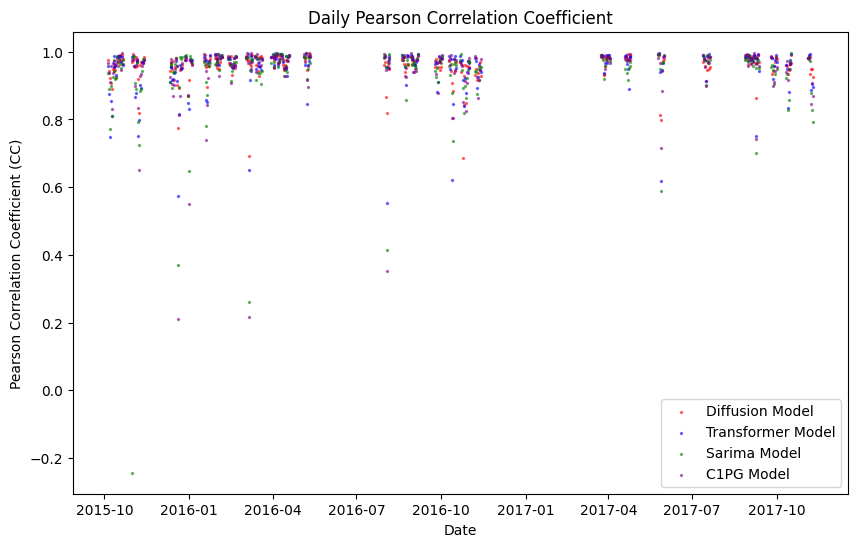

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

results_df['Date'] = pd.to_datetime(results_df['Date'])
results_tran['Date'] = pd.to_datetime(results_tran['Date'])
results_arima['Date'] = pd.to_datetime(results_arima['Date'])
results_c1pg['Date'] = pd.to_datetime(results_c1pg['Date'])

plt.figure(figsize=(10, 6))


plt.scatter(results_df['Date'], results_df['CC'], color='red', s=2, alpha=0.5, label='Diffusion Model')
plt.scatter(results_tran['Date'], results_tran['CC'], color='blue', s=2, alpha=0.5, label='Transformer Model')
plt.scatter(results_arima['Date'], results_arima['CC'], color='green', s=2, alpha=0.5, label='Sarima Model')
plt.scatter(results_c1pg['Date'], results_c1pg['CC'], color='purple', s=2, alpha=0.5, label='C1PG Model')

# 设置图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('Daily Pearson Correlation Coefficient')
plt.xlabel('Date')
plt.ylabel('Pearson Correlation Coefficient (CC)')
# plt.savefig('./d3vae/exp/cc_strong.pdf', dpi=200)

In [29]:
# 为每个DataFrame添加一个来源列
results_df['Source'] = 'Diffusion'
results_tran['Source'] = 'Transformer'
results_arima['Source'] = 'SARIMA'
results_c1pg['Source'] = 'C1PG'

# 合并三个DataFrame
all_results = pd.concat([results_tran, results_df, results_arima, results_c1pg], ignore_index=True)

# 定义区间，注意区间是左开右闭的
bins = [0, 0.6, 0.9, 0.95, 1]
labels = [ '0-0.6', '0.6-0.9', '0.9-0.95', '0.95-1']

## 分类
all_results['CC_Range'] = pd.cut(all_results['CC'], bins=bins, labels=labels, include_lowest=True)

# 分别计算每个来源的CC范围百分比
for source in all_results['Source'].unique():
    source_data = all_results[all_results['Source'] == source]
    percentage = source_data['CC_Range'].value_counts(normalize=True).sort_index() * 100
    percentage_df = percentage.reset_index()
    percentage_df.columns = ['CC Range', 'Percentage']
    print(f"{source} CC Range Distribution:\n{percentage_df}\n")

Transformer CC Range Distribution:
   CC Range  Percentage
0     0-0.6    0.806452
1   0.6-0.9   11.693548
2  0.9-0.95   13.306452
3    0.95-1   74.193548

Diffusion CC Range Distribution:
   CC Range  Percentage
0     0-0.6    0.000000
1   0.6-0.9    6.048387
2  0.9-0.95   18.548387
3    0.95-1   75.403226

SARIMA CC Range Distribution:
   CC Range  Percentage
0     0-0.6    1.619433
1   0.6-0.9   11.740891
2  0.9-0.95   19.838057
3    0.95-1   66.801619

C1PG CC Range Distribution:
   CC Range  Percentage
0     0-0.6    1.612903
1   0.6-0.9   10.080645
2  0.9-0.95   16.532258
3    0.95-1   71.774194



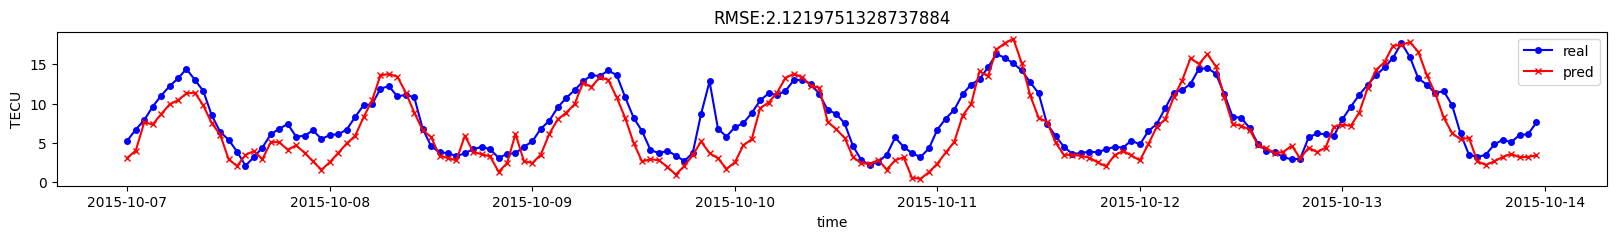

In [31]:
# diffusion

real_data = strong['2015-10-07':'2015-10-13']


pred_diffusion = diffusion_strong['2015-10-07':'2015-10-13']

plt.figure(figsize=(20, 2))


plt.plot(real_data, color="blue", label="real", marker='o', linestyle='-', markersize=4)
plt.plot(pred_diffusion, color="r", label="pred", marker='x', linestyle='-', markersize=4)

plt.legend()

rmse = RMSE(real_data,pred_diffusion)
plt.title("RMSE:{}".format(rmse))
plt.xlabel("time")
plt.ylabel("TECU")
plt.show()


<Figure size 2000x200 with 0 Axes>

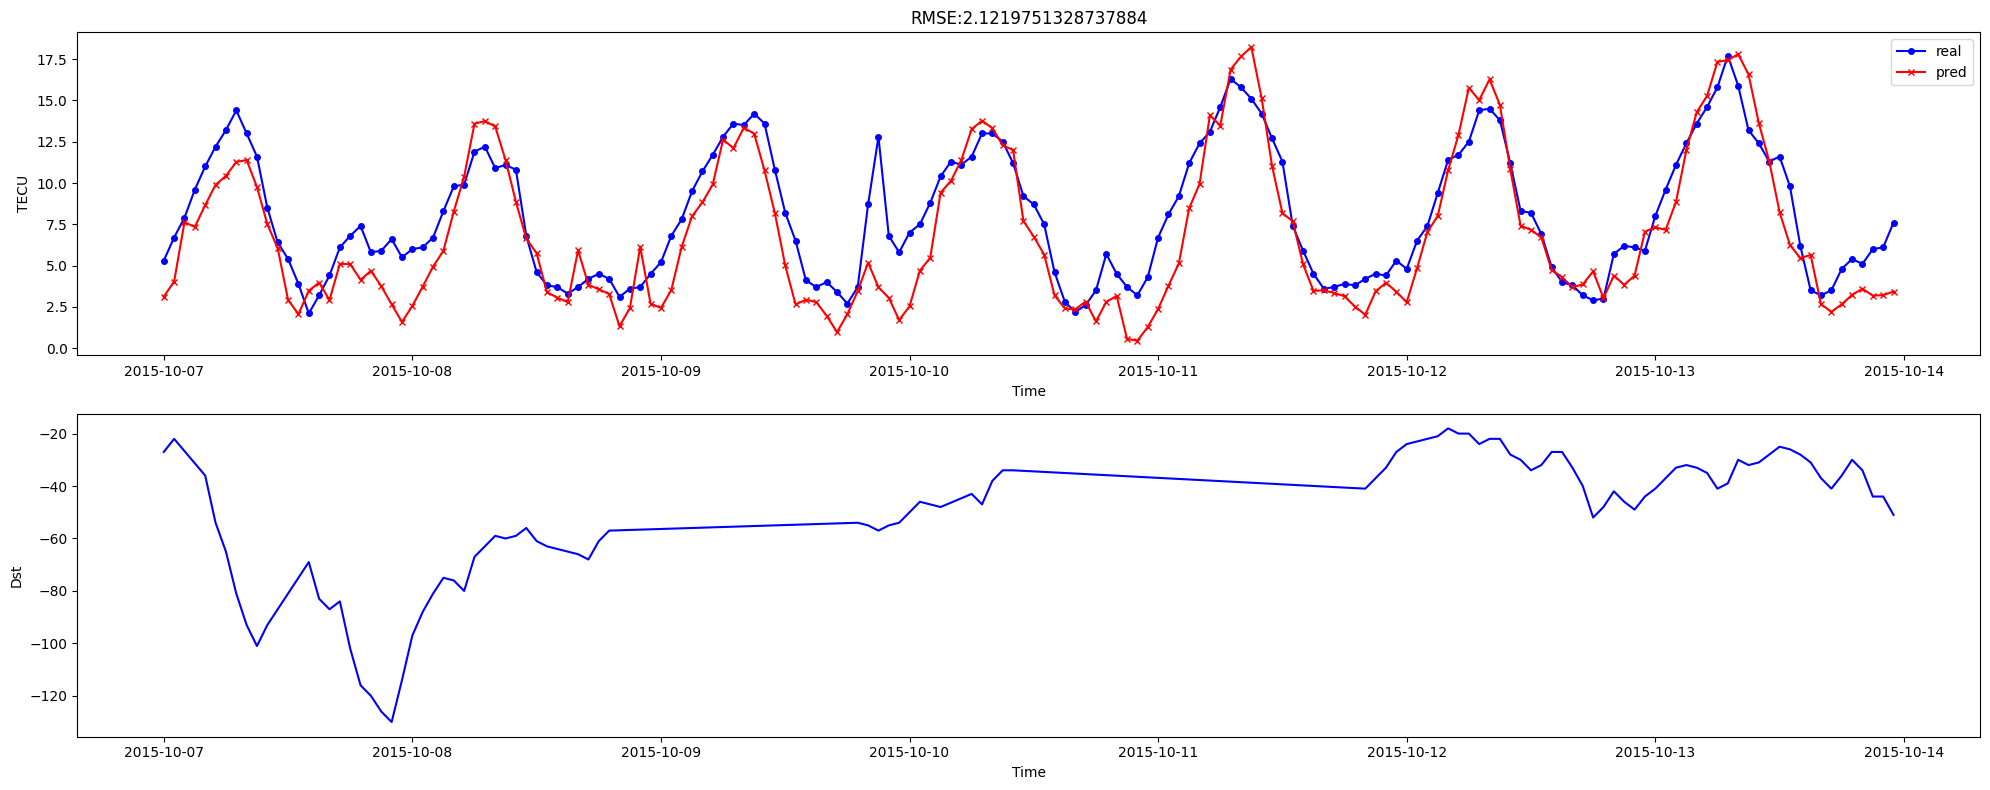

In [42]:
plt.figure(figsize=(20, 2))
dst_data = df["Dst"]['2015-10-07':'2015-10-13']

fig, axs = plt.subplots(2, 1, figsize=(20, 8))  # 创建两个垂直子图

axs[0].plot(real_data, color="blue", label="real", marker='o', linestyle='-', markersize=4)
axs[0].plot(arima['2016-10-07':'2016-10-13'], color="r", label="pred", marker='x', linestyle='-', markersize=4)
axs[0].set_title("RMSE:{}".format(rmse))
axs[0].legend()
axs[0].set_xlabel('Time')
axs[0].set_ylabel('TECU')


axs[1].plot(dst_data,  linestyle='-', color='b')

axs[1].set_xlabel('Time')
axs[1].set_ylabel('Dst')

plt.tight_layout()
plt.show()


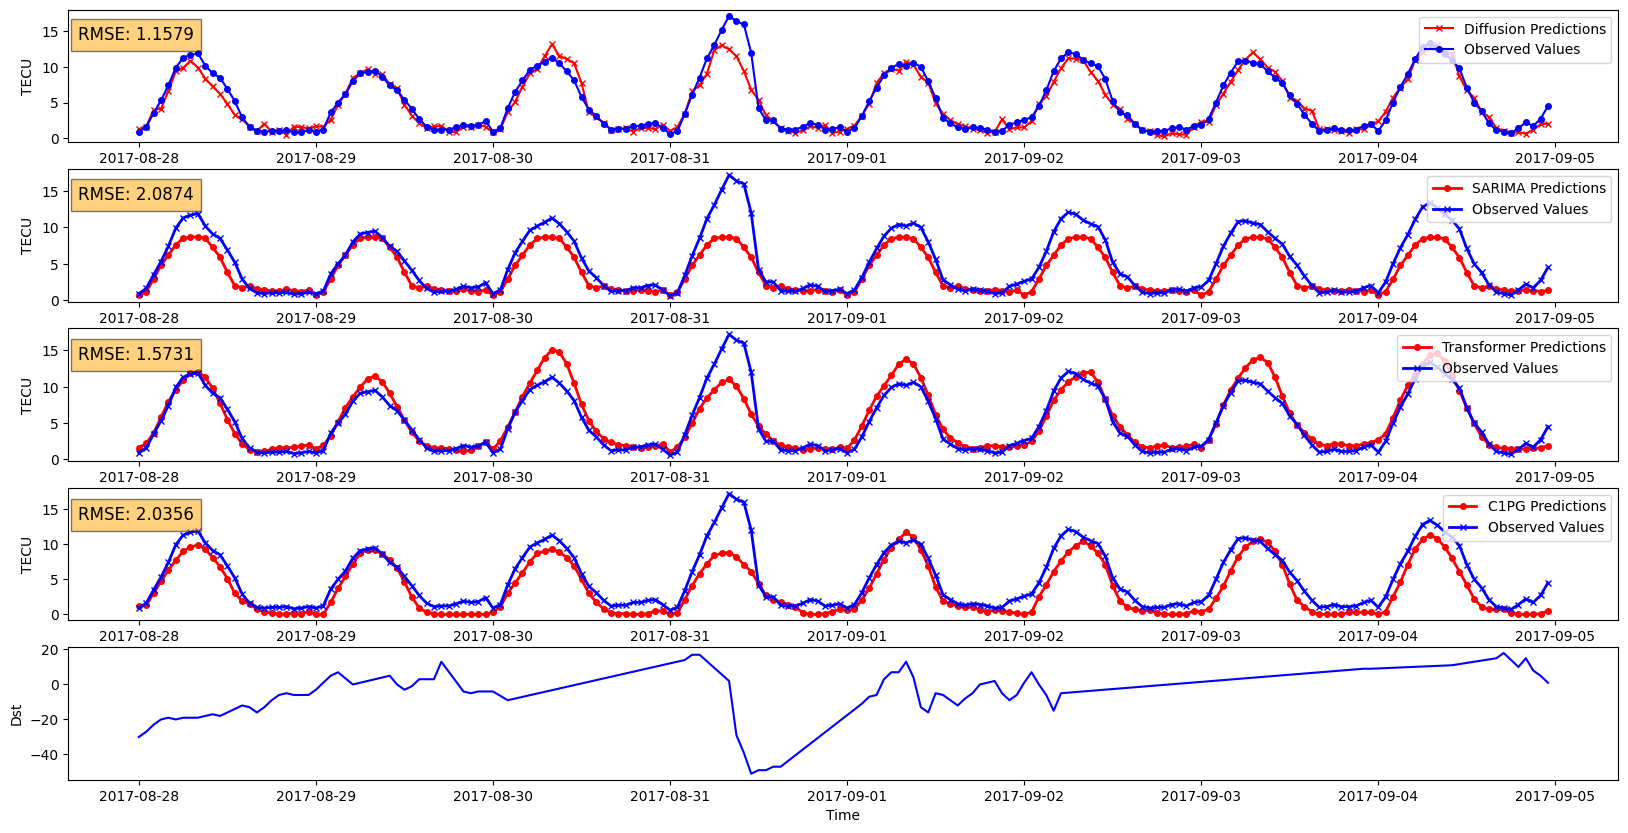

In [32]:
fig, axs = plt.subplots(5, 1, figsize=(20, 10))  # 创建两个垂直子图
start = '2017-08-28'
end = '2017-09-04'
real_data = real_[start:end]
arima_pred_data = arima_[start:end]
tran_pred_data = tran_[start:end]
pred_diffusion = diffusion_[start:end]
c1pg_pred = c1pg[start:end]
axs[0].plot(pred_diffusion, color="r", label="Diffusion Predictions", marker='x', linestyle='-', markersize=4)
axs[0].plot(real_data, color="blue", label="Observed Values", marker='o', linestyle='-', markersize=4)
rmse1 = RMSE(real_data, pred_diffusion)
axs[0].legend(loc='upper right')
axs[0].set_ylabel('TECU')
plt.figtext(0.13, 0.85, f'RMSE: {rmse1:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})


axs[1].plot(arima_pred_data, color='red', label='SARIMA Predictions', marker='o',linewidth=2, markersize=4)
axs[1].plot(real_data, color='blue', label='Observed Values', marker='x',linewidth=2, markersize=4)
rmse = RMSE(arima_pred_data, real_data)
axs[1].legend(loc='upper right')
axs[1].set_ylabel('TECU')
plt.figtext(0.13, 0.69, f'RMSE: {rmse:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

axs[2].plot(tran_pred_data, color='red', label='Transformer Predictions', marker='o',linewidth=2, markersize=4)
axs[2].plot(real_data, color='blue', label='Observed Values', marker='x',linewidth=2, markersize=4)
rmse2 = RMSE(tran_pred_data, real_data)
axs[2].legend(loc='upper right')
axs[2].set_ylabel('TECU')
plt.figtext(0.13, 0.53, f'RMSE: {rmse2:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

axs[3].plot(c1pg_pred, color='red', label='C1PG Predictions', marker='o',linewidth=2, markersize=4)
axs[3].plot(real_data, color='blue', label='Observed Values', marker='x',linewidth=2, markersize=4)
rmse2 = RMSE(c1pg_pred, real_data)
axs[3].legend(loc='upper right')
axs[3].set_ylabel('TECU')
plt.figtext(0.13, 0.37, f'RMSE: {rmse2:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})



axs[4].plot(selected_data[start:end]['Dst'], linestyle='-', color='b')
axs[4].set_ylabel('Dst')
axs[4].set_xlabel('Time')
plt.savefig('/home/yyh/d3vae/exp/strong3.pdf', dpi=300)
plt.show()


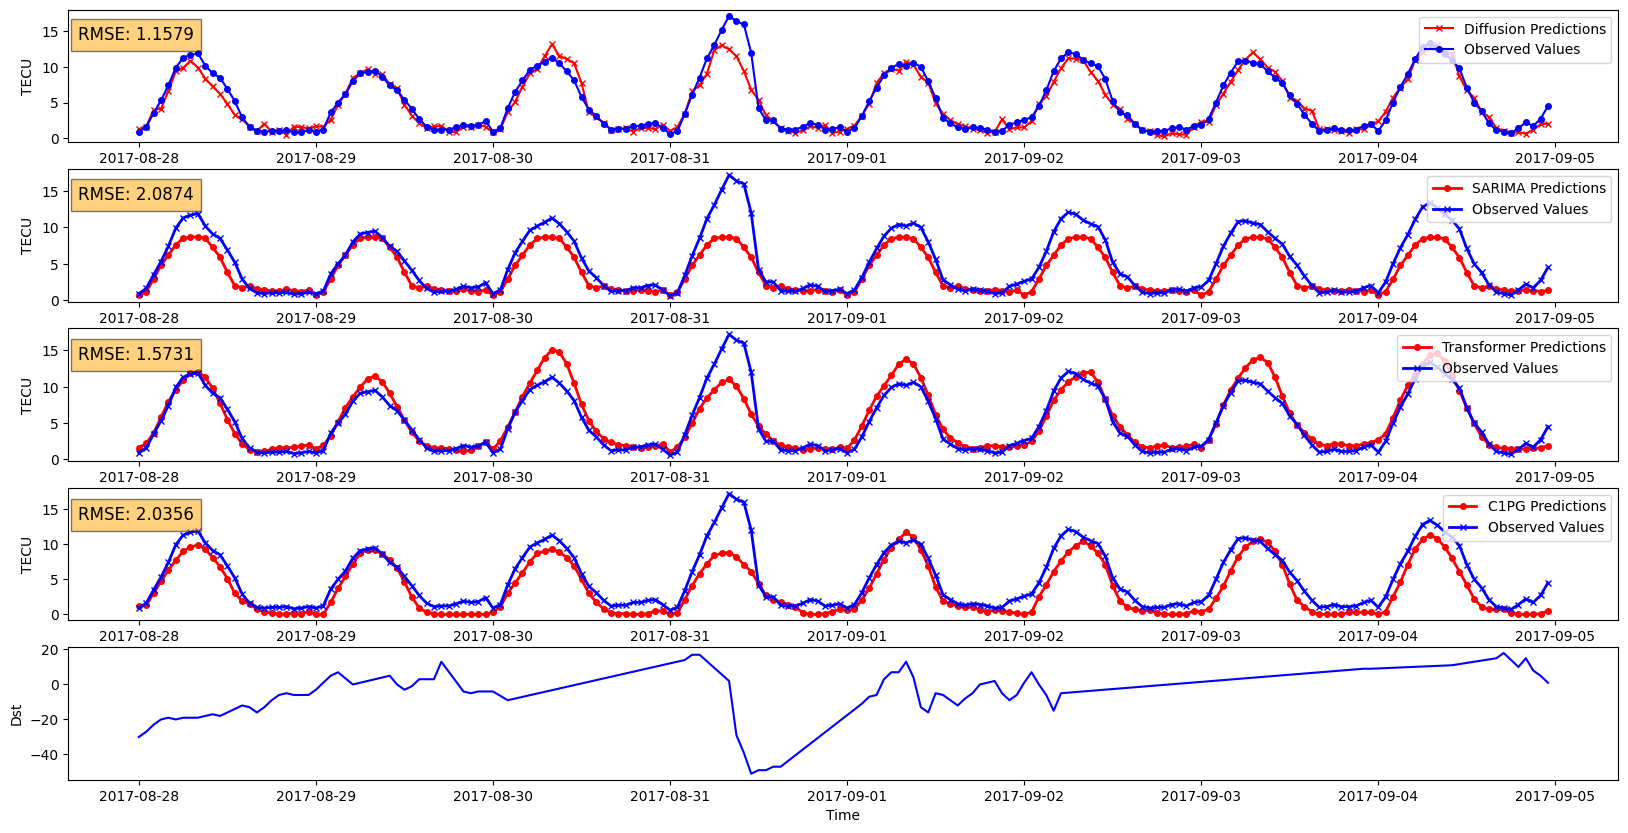

In [36]:
fig, axs = plt.subplots(5, 1, figsize=(20, 10))  # 创建两个垂直子图
start = '2017-08-28'
end = '2017-09-04'
real_data = real_[start:end]
arima_pred_data = arima_[start:end]
tran_pred_data = tran_[start:end]
pred_diffusion = diffusion_[start:end]
c1pg_pred = c1pg[start:end]
axs[0].plot(pred_diffusion, color="r", label="Diffusion Predictions", marker='x', linestyle='-', markersize=4)
axs[0].plot(real_data, color="blue", label="Observed Values", marker='o', linestyle='-', markersize=4)
rmse1 = RMSE(real_data, pred_diffusion)
axs[0].legend(loc='upper right')
axs[0].set_ylabel('TECU')
plt.figtext(0.13, 0.85, f'RMSE: {rmse1:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})


axs[1].plot(arima_pred_data, color='red', label='SARIMA Predictions', marker='o',linewidth=2, markersize=4)
axs[1].plot(real_data, color='blue', label='Observed Values', marker='x',linewidth=2, markersize=4)
rmse = RMSE(arima_pred_data, real_data)
axs[1].legend(loc='upper right')
axs[1].set_ylabel('TECU')
plt.figtext(0.13, 0.69, f'RMSE: {rmse:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

axs[2].plot(tran_pred_data, color='red', label='Transformer Predictions', marker='o',linewidth=2, markersize=4)
axs[2].plot(real_data, color='blue', label='Observed Values', marker='x',linewidth=2, markersize=4)
rmse2 = RMSE(tran_pred_data, real_data)
axs[2].legend(loc='upper right')
axs[2].set_ylabel('TECU')
plt.figtext(0.13, 0.53, f'RMSE: {rmse2:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

axs[3].plot(c1pg_pred, color='red', label='C1PG Predictions', marker='o',linewidth=2, markersize=4)
axs[3].plot(real_data, color='blue', label='Observed Values', marker='x',linewidth=2, markersize=4)
rmse2 = RMSE(c1pg_pred, real_data)
axs[3].legend(loc='upper right')
axs[3].set_ylabel('TECU')
plt.figtext(0.13, 0.37, f'RMSE: {rmse2:.4f}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})



axs[4].plot(selected_data[start:end]['Dst'], linestyle='-', color='b')
axs[4].set_ylabel('Dst')
axs[4].set_xlabel('Time')
# plt.savefig('/home/yyh/d3vae/exp/strong3.pdf', dpi=300)
plt.show()
